# Vector Space Model

$$

C = 
\left(\begin{array}{cc} 
d_1\\
d_2\\
.\\
.\\
d_m\\
\end{array}\right)
=
\left(\begin{array}{cc} 
w_{1, 1} & ... & w_{1, n}\\
w_{2, 1} & ... & w_{2, n}\\
... & ... & ...\\ 
... & ... & ...\\ 
w_{m, 1} & ... & w_{m, n}
\end{array}\right)
$$

#### Similarity (angle)

$D_1$ = [green, blue, blue] = <1, 2, 0>

$D_2$ = [green, blue, red, red] = <1, 1, 2>

$D_1 \cdot D_2$ = $1 \cdot 1 + 2 \cdot 1 + 0 \cdot 2$ = 3

$||D_1|| \cdot ||D_2||$ = $\sqrt[]{1^2 + 2^2 + 0^2} \cdot \sqrt[]{1^2 + 1^2 + 2^2}$ = $\sqrt[]{5} \cdot \sqrt[]{6}$

$\frac{3}{\sqrt[]{5} \cdot \sqrt[]{6}} \approx 0.55 $

# Scoring

In [13]:
documents = [
     'He is internationally known for making great music', 
     'He is globally prominent for making great music',
     'They are widely known around the planet',
     'They are prominent around the planet',
     'You have been proudly acknowledged for your actions',
]

## Bag of Words (BOW)

With Bag of Words (BOW), we refer to a Vector Space Model where:
    
    > Terms: words (more generally we may use n-grams, etc.)
    > Weights: number of occurences of the terms in the document.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(documents)
X_train_counts

<5x23 sparse matrix of type '<class 'numpy.int64'>'
	with 37 stored elements in Compressed Sparse Row format>

In [15]:
# Convert to standard matrix
X_train_counts.toarray()

array([[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1]], dtype=int64)

In [16]:
# Print the features (corresponding to the columns of the term-document matrix)
count_vect.get_feature_names()

['acknowledged',
 'actions',
 'are',
 'around',
 'been',
 'for',
 'globally',
 'great',
 'have',
 'he',
 'internationally',
 'is',
 'known',
 'making',
 'music',
 'planet',
 'prominent',
 'proudly',
 'the',
 'they',
 'widely',
 'you',
 'your']

## TF_IDF

In [17]:
#   only tf

from sklearn.feature_extraction.text import TfidfVectorizer 

#  we firstly use the fit(..) method to fit our estimator to the data
tf_vectorizer = TfidfVectorizer(use_idf=False).fit(documents)
#  the transform(..) method to transform our count-matrix to a tf-idf representation.
X_tf = tf_vectorizer.transform(documents)
# Convert to standard matrix
X_tf.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.35355339, 0.        , 0.35355339, 0.        , 0.35355339,
        0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.35355339,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.35355339, 0.35355339, 0.35355339, 0.        , 0.35355339,
        0.        , 0.35355339, 0.        , 0.35355339, 0.35355339,
        0.        , 0.35355339, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.37796447, 0.37796447, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37796447, 0.        , 0.        ,
        0.37796447, 0.        , 0.        , 0.37796447, 0.37796447,
        0.37796447, 0.        , 0.        ],
       [0.        , 0.        , 0.40824829, 0.408

In [18]:
#   tf–idf
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
# Convert to standard matrix
X_tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28943314, 0.        , 0.34867668, 0.        , 0.34867668,
        0.43217576, 0.34867668, 0.34867668, 0.34867668, 0.34867668,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28943314, 0.43217576, 0.34867668, 0.        , 0.34867668,
        0.        , 0.34867668, 0.        , 0.34867668, 0.34867668,
        0.        , 0.34867668, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.364268  , 0.364268  , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.364268  , 0.        , 0.        ,
        0.364268  , 0.        , 0.        , 0.364268  , 0.364268  ,
        0.45150079, 0.        , 0.        ],
       [0.        , 0.        , 0.40824829, 0.408

In [19]:
import pandas as pd

# print idf values 
df_idf = pd.DataFrame(tfidf_vectorizer.idf_
                        , index=count_vect.get_feature_names()
                        , columns=["idf_weights"])

# sort ascending 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
for,1.405465
is,1.693147
are,1.693147
around,1.693147
they,1.693147
the,1.693147
great,1.693147
he,1.693147
prominent,1.693147
planet,1.693147


In [20]:
# get the first vector out (for the first document) 
first_vector_tfidf=X_tfidf[0] 
 
# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidf.T.todense()
                    , index=tfidf_vectorizer.get_feature_names()
                    , columns=["tfidf"]) 

df.sort_values(by=["tfidf"], ascending=False)

,tfidf
internationally,0.432176
is,0.348677
great,0.348677
he,0.348677
known,0.348677
making,0.348677
music,0.348677
for,0.289433
planet,0.000000
you,0.000000


## Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

# Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

scaler = StandardScaler()
stand_X_tfidf = scaler.fit_transform(X_tfidf.toarray())
stand_X_tfidf

array([[-0.5       , -0.5       , -0.81430014, -0.81430014, -0.5       ,
         0.91903605, -0.5       ,  1.22474487, -0.5       ,  1.22474487,
         2.        ,  1.22474487,  1.17963513,  1.22474487,  1.22474487,
        -0.81430014, -0.81231443, -0.5       , -0.81430014, -0.81430014,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.81430014, -0.81430014, -0.5       ,
         0.91903605,  2.        ,  1.22474487, -0.5       ,  1.22474487,
        -0.5       ,  1.22474487, -0.81617137,  1.22474487,  1.22474487,
        -0.81430014,  1.05864446, -0.5       , -0.81430014, -0.81430014,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       ,  1.10555246,  1.10555246, -0.5       ,
        -1.21609435, -0.5       , -0.81649658, -0.5       , -0.81649658,
        -0.5       , -0.81649658,  1.26887897, -0.81649658, -0.81649658,
         1.10555246, -0.81231443, -0.5       ,  1.10555246,  1.10555246,
         2.        , -0.5   

## Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

number of components: [1, 2, 3, 4, 5]
cumulative explained variance: [0.4433905  0.84504464 0.95965065 1.         1.        ]


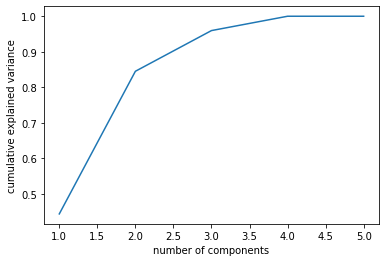

In [23]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(stand_X_tfidf)
nc  = list(range(1,1+len(pca.explained_variance_ratio_)))
ev  = np.cumsum(pca.explained_variance_ratio_)

print(f'number of components: {nc}')
print(f'cumulative explained variance: {ev}')

plt.plot(nc, ev)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

This curve quantifies how much of the total variance is contained within the first N components. For example, we see that the first 2 components contain approximately 85% of the variance, while we need 4 components to describe 100% of the variance. __Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.__

In [24]:
import pandas as pd

# Keep only the first 2 components
pca = PCA(n_components = 2)

# Fit PCA and transform the data in the new coordinates
X_pca = pca.fit_transform(stand_X_tfidf)

# term-document matrix in the new coordinates
X_pca = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2'])
X_pca

,pc1,pc2
0,-3.232832,-2.127795
1,-3.209608,-2.094494
2,3.844764,-0.893644
3,3.756576,-0.861890
4,-1.158901,5.977822


This is the term-document matrix in the new coordinates. It is much smaller than the original one. We achieved this at the price of losing 15% of information contained in the original dataset. The new coordinates are linear combinations of the original features.

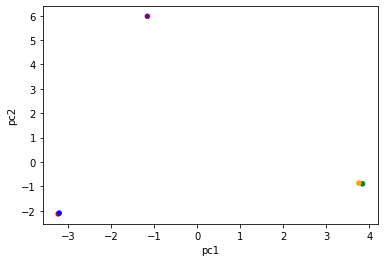

In [25]:
# plot the documents in the new 2-dimesional space
X_pca.plot(kind = 'scatter', x = 'pc1', y = 'pc2', color = ['red','blue','green','orange', 'purple'])
plt.show()

The distance between the first (red), second (blue) document is the same, like the distance between the 3-th (green) and the 4-th (orange); while the 5-th (purple) document is by itself.

## Remarks!
This is just a simple example to illustrate PCA and let visualize the data in a 2-dimensional space. In real applications:
- the number of documents should be greater than the number of features
- the term-document matrix is huge
- there are several thousands of features
- several hundreds or thousands of principal components are kept (i.e. the reduced vector space is still high-dimensional and cannot be visualized)